In [ ]:
# preamble to be able to run notebooks in Jupyter and Colab
try:
    from google.colab import drive
    import sys
    
    drive.mount('/content/drive')
    notes_home = "/content/drive/My Drive/CSC310/notes/"
    user_home = "/content/drive/My Drive/"
    sys.path.insert(1,notes_home) # let the notebook access the notes folder

except ModuleNotFoundError:
    notes_home = "" # running native Jupyter environment -- notes home is the same as the notebook
    user_home = ""  # under Jupyter we assume the user directory is the same as the notebook

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
url ="https://raw.githubusercontent.com/IndraniMandal/CSC310-S20/master/messy_covid19_southamerica%20-%20covid19_southamerica.csv"
df = pd.read_csv(url)

In [ ]:
import sys

if 'google.colab' in sys.modules:
  !pip install -q dtreeviz


In [ ]:
import os 
os.chdir('/content/drive/My Drive/CSC310/notes/assets')
from dtreeviz.trees import *
from assets.treeviz import tree_print
from IPython.display import Image, display_svg, SVG

#### Which column has the maximum missing value? What % value is missing in that column? Should you keep this column or drop it? Why?

> The column with the most missing value is the Provice_State. That column had a %25.9 missing values. I think I should keep the column and try to obtain as much useful data that it has.
####    There are some columns with only a few data points missing. Should you drop these columns too? Why or why not? How should you handle these specific data points(particular row)?


> For the columns that are missing only a few data points I think that I should keep them since they contain a good amount of usefull data that generaly will not throw the main target points off a correct outcome. Specificully looking at the "Active column this one has a %12 missing value rate which I cannot over look. This will lead me to most likely removing this row aswell due to the fact it can impact the data in a bad way since it lacks a good amount of usefull data.  


####    There are some data that has incorrect information like instead of a number they might have strings. How are you handling these data points(rows)?


> For these rows I will be locating the row and eleminating them from the data frame so it does not ruine the data set


####    After you have cleaned your data, create a plot, or print out the top 10 countries with the most number of confirmed cases.  


> Indented block





In [ ]:
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                'percent_missing': percent_missing})
print(missing_value_df)
df

                     column_name  percent_missing
ObservationDate  ObservationDate         0.000000
Country_Region    Country_Region         0.000000
Province_State    Province_State        25.870410
Confirmed              Confirmed         0.004320
Deaths                    Deaths         0.012959
Recovered              Recovered         0.008639
Active                    Active         0.112311


,ObservationDate,Country_Region,Province_State,Confirmed,Deaths,Recovered,Active
0,2020-01-23,Mexico,NaN,0.0,0,0,0.0
1,2020-01-23,Brazil,NaN,0.0,0,0,0.0
2,2020-01-23,Colombia,NaN,0.0,0,0,0.0
3,2020-02-26,Brazil,NaN,1.0,0,0,1.0
4,2020-02-26,Brazil,NaN,1.0,0,0,1.0
...,...,...,...,...,...,...,...
23145,2020-09-28,Saint Vincent and the Grenadines,NaN,64.0,0,64,0.0
23146,2020-09-28,Suriname,NaN,4836.0,102,4667,67.0
23147,2020-09-28,Trinidad and Tobago,NaN,4386.0,72,2275,2039.0
23148,2020-09-28,Uruguay,NaN,2010.0,47,1755,208.0


In [ ]:
df.dropna(how='any', axis=0)

,ObservationDate,Country_Region,Province_State,Confirmed,Deaths,Recovered,Active
2333,2020-05-20,Brazil,Acre,2817.0,76,0,2741.0
2334,2020-05-20,Mexico,Aguascalientes,558.0,21,384,153.0
2335,2020-05-20,Brazil,Alagoas,4437.0,251,0,4186.0
2336,2020-05-20,Brazil,Amapa,4549.0,142,0,4407.0
2337,2020-05-20,Brazil,Amazonas,23704.0,1561,0,22143.0
...,...,...,...,...,...,...,...
23138,2020-09-28,Peru,San Martin,17502.0,697,0,16805.0
23139,2020-09-28,Peru,Tacna,11858.0,210,0,11648.0
23140,2020-09-28,Peru,Tumbes,7273.0,300,0,6973.0
23141,2020-09-28,Peru,Ucayali,16025.0,315,0,15710.0


In [ ]:
df = df.drop(['ObservationDate','Province_State','Deaths', 'Recovered', 'Active'], axis=1)
df.groupby(['Confirmed'])

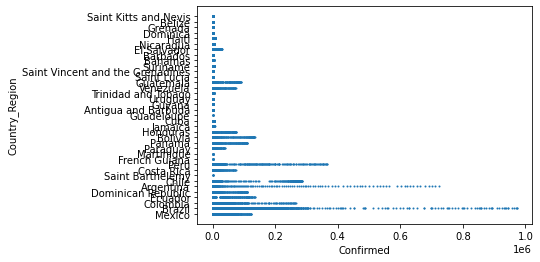

In [ ]:
df.plot.scatter(x = 'Confirmed', y = 'Country_Region', s=1)